In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(512, 512, 3)


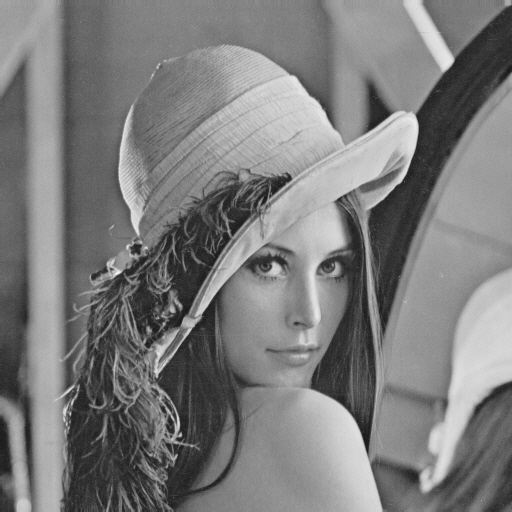

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Images/lena.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gImg = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
print(gImg.shape)
cv2_imshow(gray_img)

In [ ]:
gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = int)
gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

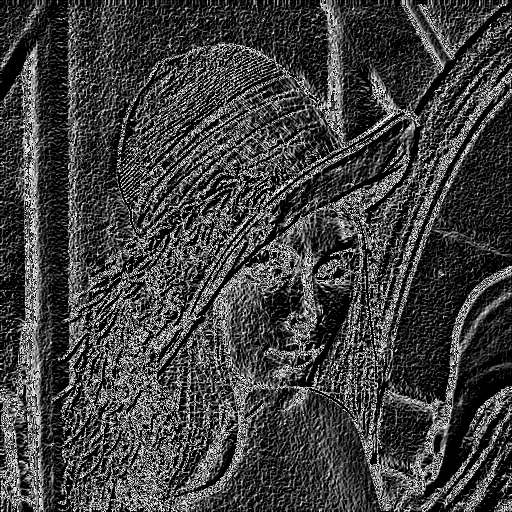

In [ ]:
outImg = outImg * 10
cv2_imshow(outImg)

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

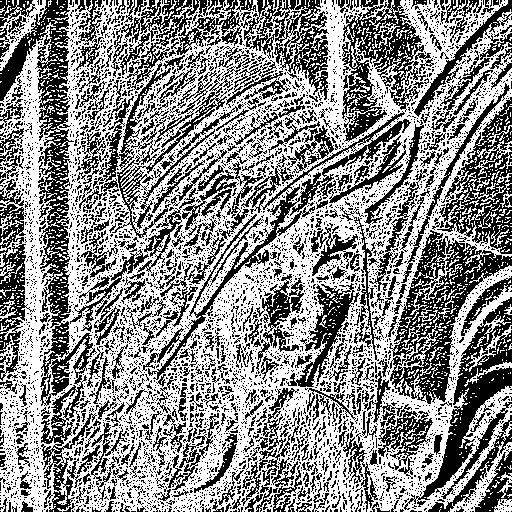

In [ ]:
threshold = 30

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if(outImg[h,w] > threshold).any():
      gBin[h,w] = 255

cv2_imshow(gBin)

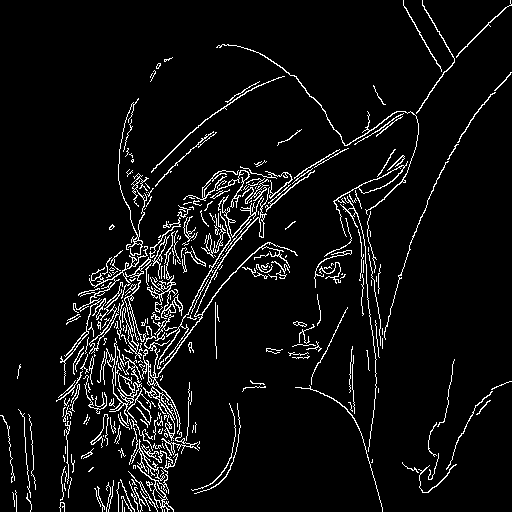

In [ ]:
cannyImg = cv2.Canny(gImg, 100, 200)
cv2_imshow(cannyImg)


In [ ]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [ ]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

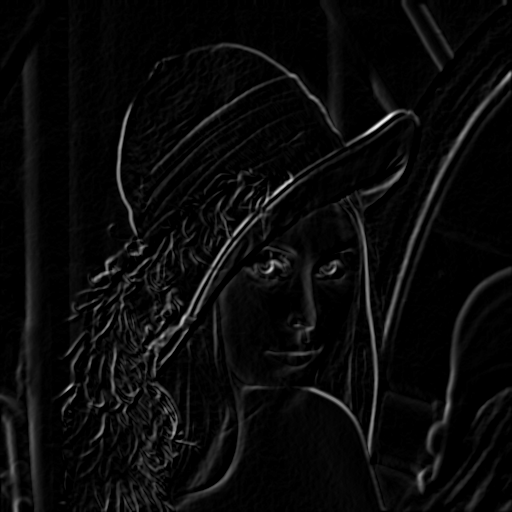

In [ ]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
cv2_imshow(cannyOutImg)

In [ ]:
cannyDirection = np.arctan2(x,y)